# K折交叉验证


## 设置路径


In [2]:
import os
import sys
root=os.path.abspath(os.path.join(r"D:\project_meta\NNproject\NNI"))
print(root)
sys.path.append(root)
os.environ["TORCH_HOME"]=r"E:\Data\torch-model"
import warnings  
warnings.filterwarnings("ignore", category=RuntimeWarning, module="mne")


D:\project_meta\NNproject\NNI


## 数据集准备


In [3]:
import torch
import pandas as pd
from project.dataprocess import FolderTree
from project.dataset.SelfDataset import TableControlFullLoadDataset
from torch.utils.data import DataLoader, Subset, SubsetRandomSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from d2l import torch as d2l


In [4]:
data_root=r'D:\dataset\driver_dataset\DROZY\DROZY'
output_root=r"D:\project_meta\NNproject\NNI\output"
data_path_dict=FolderTree.getDataPath(data_root=data_root)
output_path_dic=FolderTree.getOutPath(output_root=output_root)
info_table=pd.read_csv(output_path_dic["info_file"])
dataset=TableControlFullLoadDataset(info_table,data_root=data_root,output_root=output_root,Mintime=15)

In [5]:
from project.model.CNN1D import simple_cnn1d
num_classes=3
cnn=simple_cnn1d(input_channels=5,num_classes=num_classes,list_down=[16,32,64,64,64])
from torchsummary import summary
summary(cnn,(5,3*2560),batch_size=3,device="cpu")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [3, 16, 7680]             576
       BatchNorm1d-2              [3, 16, 7680]              32
              ReLU-3              [3, 16, 7680]               0
         MaxPool1d-4              [3, 16, 3839]               0
            Conv1d-5              [3, 32, 1920]           1,568
       BatchNorm1d-6              [3, 32, 1920]              64
              ReLU-7              [3, 32, 1920]               0
            Conv1d-8               [3, 64, 960]           6,208
       BatchNorm1d-9               [3, 64, 960]             128
             ReLU-10               [3, 64, 960]               0
           Conv1d-11               [3, 64, 480]          12,352
      BatchNorm1d-12               [3, 64, 480]             128
             ReLU-13               [3, 64, 480]               0
           Conv1d-14               [3, 

## 参数准备

In [6]:
import torch
from d2l import torch as d2l
import torch.nn.functional as F
import datetime
import sklearn as sk
from sklearn.metrics import precision_score, recall_score, f1_score
from project.model.CNN1D import simple_cnn1d

##设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"当前设备：{device}")
##模型
net=simple_cnn1d(input_channels=5,num_classes=num_classes,list_down=[16,32,64,64,64])
net.to(device)

##优化器
optim=torch.optim.SGD(net.parameters(),lr=0.05,weight_decay=5e-4)

##损失函数
loss=torch.nn.CrossEntropyLoss().to(device="cuda")

##最大循环数
num_epochs=500

# animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
#                         legend=['train_acc','test_acc'])   
# timer = d2l.Timer()

#权重参数存储目录
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y_%m_%d_%H_%M_%S")
parameterFolder=os.path.join(r"D:\project_meta\NNproject\NNI\output\model_parameter\FilterSignalCNN1D",f"{formatted_time}")
print(parameterFolder)
os.makedirs(parameterFolder)


当前设备：cuda
D:\project_meta\NNproject\NNI\output\model_parameter\FilterSignalCNN1D\2023_11_07_09_07_06


In [7]:

# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10, shuffle=True, random_state=0)
# a,b=next(iter(kf.split(dataset)))
# print(a.shape,b.shape)
# train_fold = torch.utils.data.dataset.Subset(dataset, a)
# len(train_fold)


In [8]:
# import collections
# import hashlib
# import inspect
# import math
# import os
# import random
# import re
# import shutil
# import sys
# import tarfile
# import time
# import zipfile
# from collections import defaultdict
# import pandas as pd
# import requests
# from IPython import display
# from matplotlib import pyplot as plt
# from matplotlib_inline import backend_inline
# class Animator:
#     """For plotting data in animation."""
#     def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
#                  ylim=None, xscale='linear', yscale='linear',
#                  fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
#                  figsize=(3.5, 2.5)):
#         """Defined in :numref:`sec_utils`"""
#         # Incrementally plot multiple lines
#         if legend is None:
#             legend = []
#         d2l.use_svg_display()
#         self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
#         if nrows * ncols == 1:
#             self.axes = [self.axes, ]
#         # Use a lambda function to capture arguments
#         self.config_axes = lambda: d2l.set_axes(
#             self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
#         self.X, self.Y, self.fmts = None, None, fmts

#     def add(self, x, y):
#         # Add multiple data points into the figure
#         if not hasattr(y, "__len__"):
#             y = [y]
#         n = len(y)
#         if not hasattr(x, "__len__"):
#             x = [x] * n
#         if not self.X:
#             self.X = [[] for _ in range(n)]
#         if not self.Y:
#             self.Y = [[] for _ in range(n)]
#         for i, (a, b) in enumerate(zip(x, y)):
#             if a is not None and b is not None:
#                 self.X[i].append(a)
#                 self.Y[i].append(b)
                
#         self.axes[0].cla()
#         for x, y, fmt in zip(self.X, self.Y, self.fmts):
#             self.axes[0].plot(x, y, fmt)
#         if len(x) > 0 and len(y) > 0:
#             self.axes[0].text(x[-1], y[-1], f'{y[-1]:.2f}', ha='center', va='bottom')
#         self.config_axes()
#         display.display(self.fig)
#         display.clear_output(wait=True)

KeyboardInterrupt: 

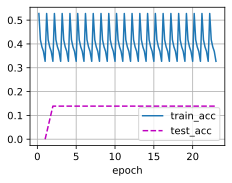

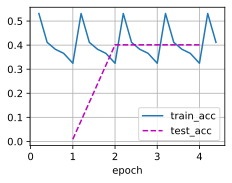

In [12]:
from sklearn.model_selection import KFold
 
kf = KFold(n_splits=10, shuffle=False)
AnimatorList=[]
for  kf_i,(train_index, val_index) in enumerate(kf.split(dataset)):
    # print(train_index, test_index)
    AnimatorList.append( d2l.Animator(xlabel='epoch',
                        legend=['train_acc','test_acc']))
    animator=AnimatorList[kf_i]
    train_fold = torch.utils.data.dataset.Subset(dataset, train_index)
    val_fold = torch.utils.data.dataset.Subset(dataset, val_index)    
    
    # 打包成DataLoader类型 用于 训练
    train_loader = DataLoader(dataset=train_fold, batch_size=64, shuffle=False)
    val_loader = DataLoader(dataset=val_fold, batch_size=512, shuffle=False)
    train_size = len(train_loader)
    val_size = len(val_loader)
    num_batches=len(train_loader)
    train_dataloader=train_loader
    test_dataloader=val_loader
    # 开始进行训练
    best_train_acc=0
    best_train_loss=0
    best_test_acc=0
    stagnate_times=0

    #初始化
    net=simple_cnn1d(input_channels=5,num_classes=num_classes,list_down=[16,32,64,64,64])
    net.to(device)
    print("训练开始.....")
    temp_acc=0
    for epoch in range(num_epochs):
        metric_train = d2l.Accumulator(2)
        net.train()
        for i,data_dict in enumerate(train_dataloader):
            optim.zero_grad()
            x=data_dict["data"].to(torch.float32).to(device)     
            y=data_dict["LEVEL"].long().to(device)-1
            y_hat=net(x)
            l=F.cross_entropy(y_hat, y)
            l.mean().backward()
            optim.step()     
            pre=torch.argmax(y_hat.detach().cpu(),dim=1)
            num_true=sum(pre==y.cpu())
            metric_train.add(num_true,y.numel())
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches, (metric_train[0]/metric_train[1],None))
        net.eval()
        metric_test = d2l.Accumulator(2)
        for data_dict in test_dataloader:
            x=data_dict["data"].to(torch.float32).to(device)
            y=data_dict["LEVEL"].long().to(device)
            y_hat=net(x)
            pre=torch.argmax(y_hat.detach().cpu(),dim=1)
            num_true=sum(pre==y.cpu())
            metric_test.add(num_true,y.numel())
        animator.add(epoch+ 1, (None,metric_test[0]/metric_test[1]))
        
        stagnate_times=stagnate_times+1
        if best_test_acc<(metric_test[0]/metric_test[1]):
            best_test_acc=metric_test[0]/metric_test[1]
            stagnate_times=0
            torch.save(net.state_dict(),os.path.join(parameterFolder,f'{kf_i}_{best_test_acc}.pt'))

        if temp_acc<metric_test[0]/metric_test[1]:
            stagnate_times=0 
        temp_acc= metric_test[0]/metric_test[1]          
        if stagnate_times>20:
            break

In [ ]:
for  kf_i,(train_index, val_index) in enumerate(kf.split(dataset)):
    print(kf_i)

0
1
2
3
4
5
6
7
8
9


In [1]:
import argparse
from os import path

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as T
from lightning.fabric import Fabric, seed_everything
from sklearn import model_selection
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchmetrics.classification import Accuracy
from torchvision.datasets import MNIST


In [2]:

class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
folds=5
kfold = model_selection.KFold(n_splits=folds)
models = [Net() for _ in range(kfold.n_splits)]